# 🧠 Step 1: Import Libraries & Load Dataset

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inline in Jupyter Notebook
%matplotlib inline

# Load the dataset
df = pd.read_csv(r"f:\analysis-project\excell\Global_Cybersecurity_Threats_2015-2024.csv")

# Display first 5 rows
df.head()


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


🔍 Explanation:
We’re importing the necessary libraries:

pandas and numpy for data manipulation

matplotlib and seaborn for visualizations
Then we load your dataset and preview the first few rows.

# 📐 Step 2: Basic Info About the Dataset

In [34]:
# Shape of dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Data types and non-null counts
df.info()

# Basic statistics
df.describe(include='all')


Dataset contains 3000 rows and 10 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
count,3000,3000.000000,3000,3000,3000.000000,3000.000000,3000,3000,3000,3000.000000
unique,10,NaN,6,7,NaN,NaN,4,4,5,NaN
top,UK,NaN,DDoS,IT,NaN,NaN,Nation-state,Zero-day,Antivirus,NaN
freq,321,NaN,531,478,NaN,NaN,794,785,628,NaN
mean,NaN,2019.570333,NaN,NaN,50.492970,504684.136333,NaN,NaN,NaN,36.476000
std,NaN,2.857932,NaN,NaN,28.791415,289944.084972,NaN,NaN,NaN,20.570768
min,NaN,2015.000000,NaN,NaN,0.500000,424.000000,NaN,NaN,NaN,1.000000
25%,NaN,2017.000000,NaN,NaN,25.757500,255805.250000,NaN,NaN,NaN,19.000000
50%,NaN,2020.000000,NaN,NaN,50.795000,504513.000000,NaN,NaN,NaN,37.000000
75%,NaN,2022.000000,NaN,NaN,75.630000,758088.500000,NaN,NaN,NaN,55.000000


🔍 Explanation:
We look at:

Number of rows and columns

Data types and null values

Statistical summary for all columns

# 🧼 Step 3: Data Cleaning

In [46]:
# Check for missing values
df.isnull().sum()

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Convert 'Year' column to integer if not already
df['Year'] = df['Year'].astype(int)

# Optional: Fill or drop rows with missing data if critical
# df = df.dropna()  # OR df['column_name'].fillna(value, inplace=True)


🔍 Explanation:
Cleaning ensures data quality:

We check and handle missing data

Remove any duplicates

Convert columns to proper types

# 📊 Step 4: Univariate Analysis

# 1. Incident Trends Over Time

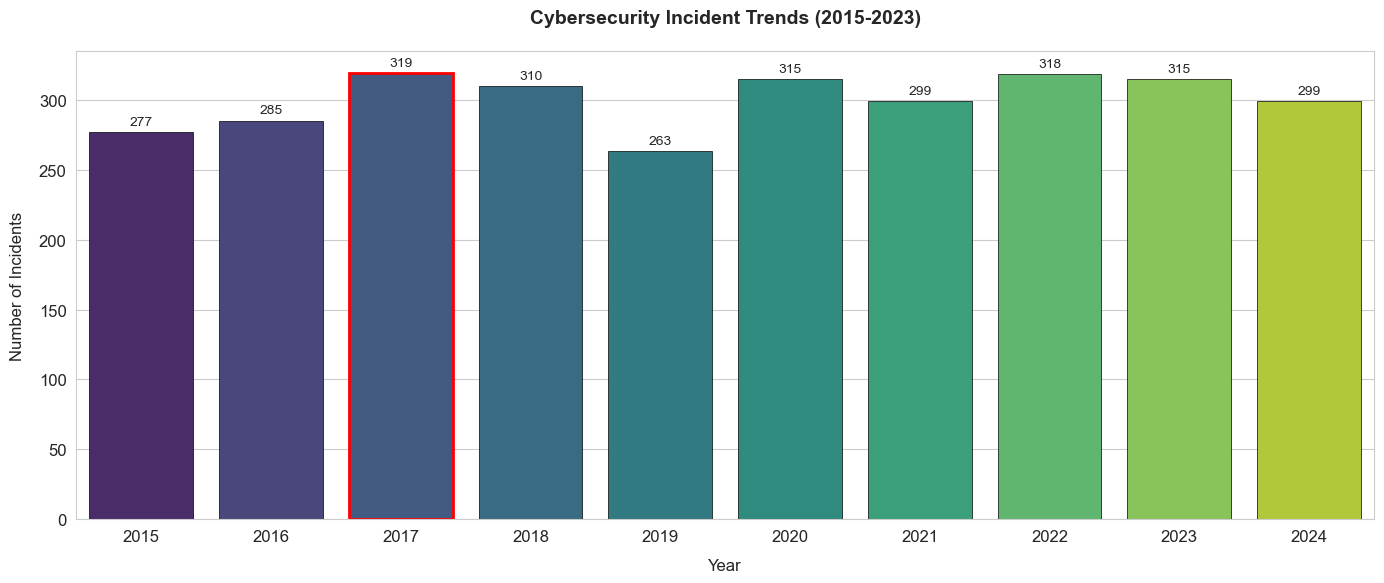

In [ ]:
# Set global style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# ---------------------------
plt.figure(figsize=(14, 6))
ax1 = sns.countplot(
    data=df,
    x='Year',
    palette='viridis',
    edgecolor='black',
    linewidth=0.5
)

# Formatting
plt.title("Cybersecurity Incident Trends (2015-2023)", 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel("Year", labelpad=10)
plt.ylabel("Number of Incidents", labelpad=10)

# Add value labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', padding=3, fontsize=10)

# Highlight max year if needed
max_year = df['Year'].value_counts().idxmax()
for idx, year in enumerate(ax1.get_xticks()):
    if ax1.get_xticklabels()[idx].get_text() == str(max_year):
        ax1.patches[idx].set_edgecolor('red')
        ax1.patches[idx].set_linewidth(2)

plt.tight_layout()
plt.show()

# ---------------------------


# 2. Attack Type Distribution

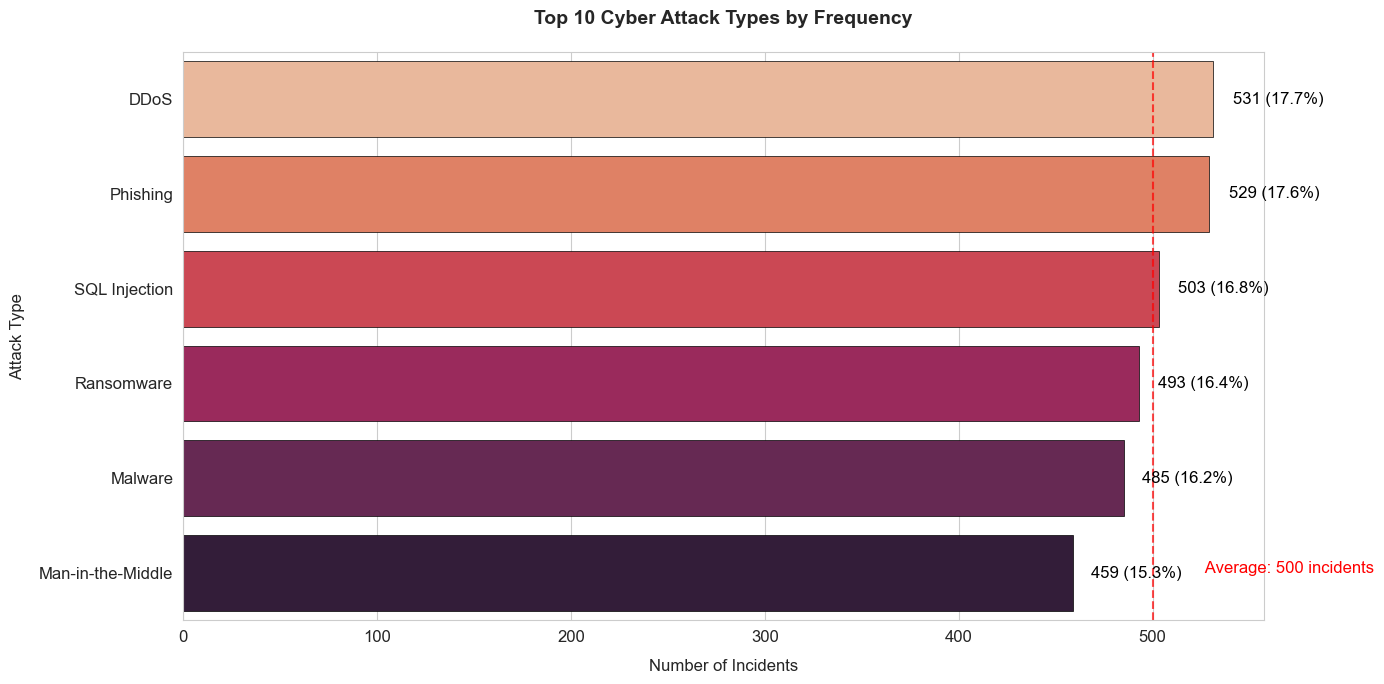

In [37]:

# ---------------------------
plt.figure(figsize=(14, 7))
attack_counts = df['Attack Type'].value_counts().head(10)

ax2 = sns.barplot(
    x=attack_counts.values,
    y=attack_counts.index,
    palette='rocket_r',  # Reverse rocket palette for better emphasis
    edgecolor='black',
    linewidth=0.5
)

# Formatting
plt.title("Top 10 Cyber Attack Types by Frequency", 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel("Number of Incidents", labelpad=10)
plt.ylabel("Attack Type", labelpad=10)

# Add percentage annotations
total = len(df)
for i, v in enumerate(attack_counts):
    percentage = 100 * v / total
    ax2.text(v + 0.02*v, i, f"{v:,} ({percentage:.1f}%)", 
            color='black', va='center')

# Add reference line for average
mean_val = attack_counts.mean()
ax2.axvline(mean_val, color='red', linestyle='--', alpha=0.7)
ax2.text(mean_val*1.05, len(attack_counts)-1, 
        f' Average: {mean_val:.0f} incidents',
        color='red')

plt.tight_layout()
plt.show()

In [38]:
# Optional: Add trendline to the yearly plot
if len(df['Year'].unique()) > 3:  # Only if sufficient data points
    x = df['Year'].value_counts().sort_index().index
    y = df['Year'].value_counts().sort_index().values
    z = np.polyfit(range(len(x)), y, 1)
    p = np.poly1d(z)
    ax1.plot(range(len(x)), p(range(len(x))), "r--")

🔍 Explanation:
We analyze individual columns:

Number of threats per year

Top attack types

# 🔗 Step 5: Bivariate & Multivariate Analysis

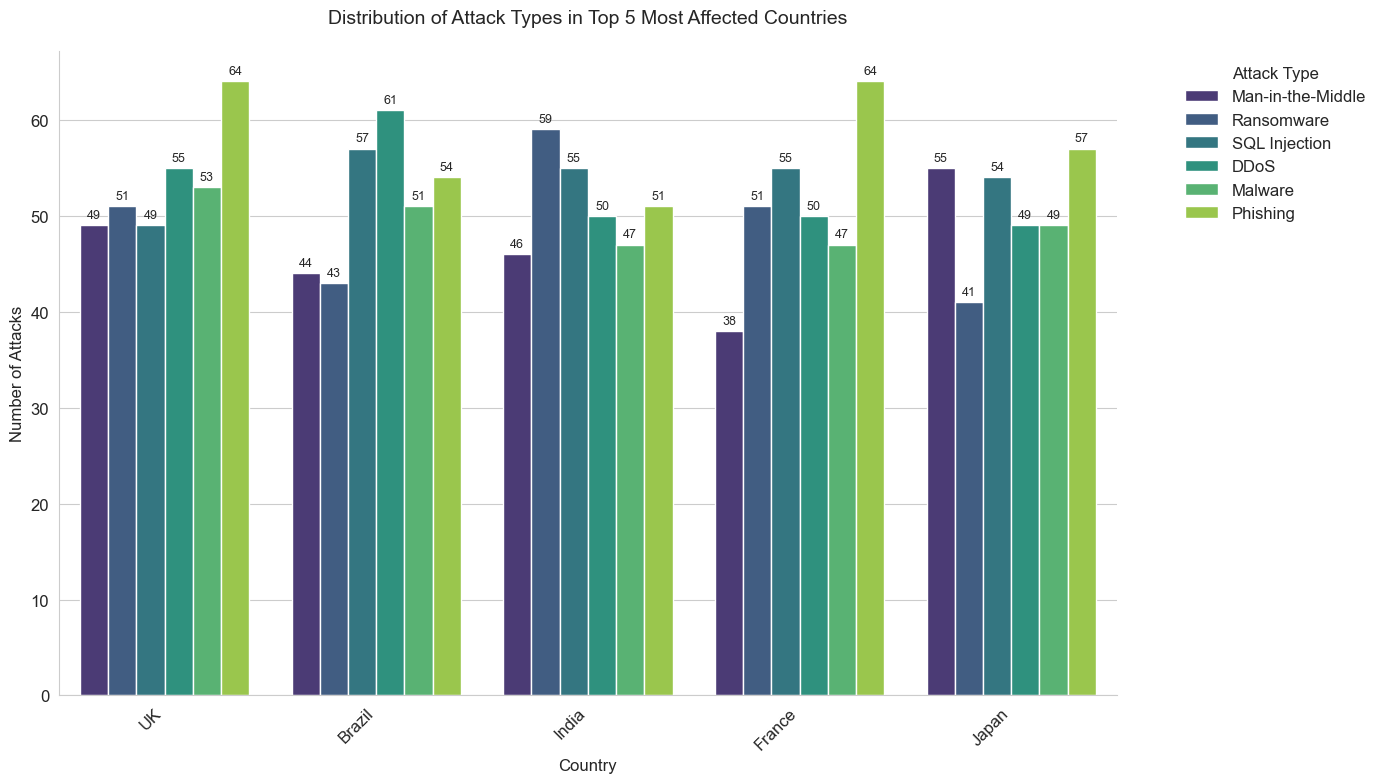

In [39]:
# Attack type by country - Top 5 countries analysis
plt.figure(figsize=(14, 8))
ax = sns.countplot(
    data=filtered_df, 
    x='Country', 
    hue='Attack Type',
    order=filtered_df['Country'].value_counts().index,  # Order by frequency
    palette='viridis'  # More visually appealing color palette
)

plt.title("Distribution of Attack Types in Top 5 Most Affected Countries", 
          fontsize=14, pad=20)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Attacks", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Better rotation alignment

# Improve legend
plt.legend(
    title='Attack Type',
    bbox_to_anchor=(1.05, 1),  # Move legend outside plot
    loc='upper left',
    frameon=False
)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=9)

# Adjust layout and style
sns.despine()  # Remove top and right spines
plt.tight_layout()

# Save the figure if needed
# plt.savefig('attack_types_by_country.png', dpi=300, bbox_inches='tight')

plt.show()

🔍 Explanation:
We explore relationships between multiple variables:

Attack type vs Country

Focus on the top countries for better insights

# 🗺️ Step 6: Sector-Wise Analysis

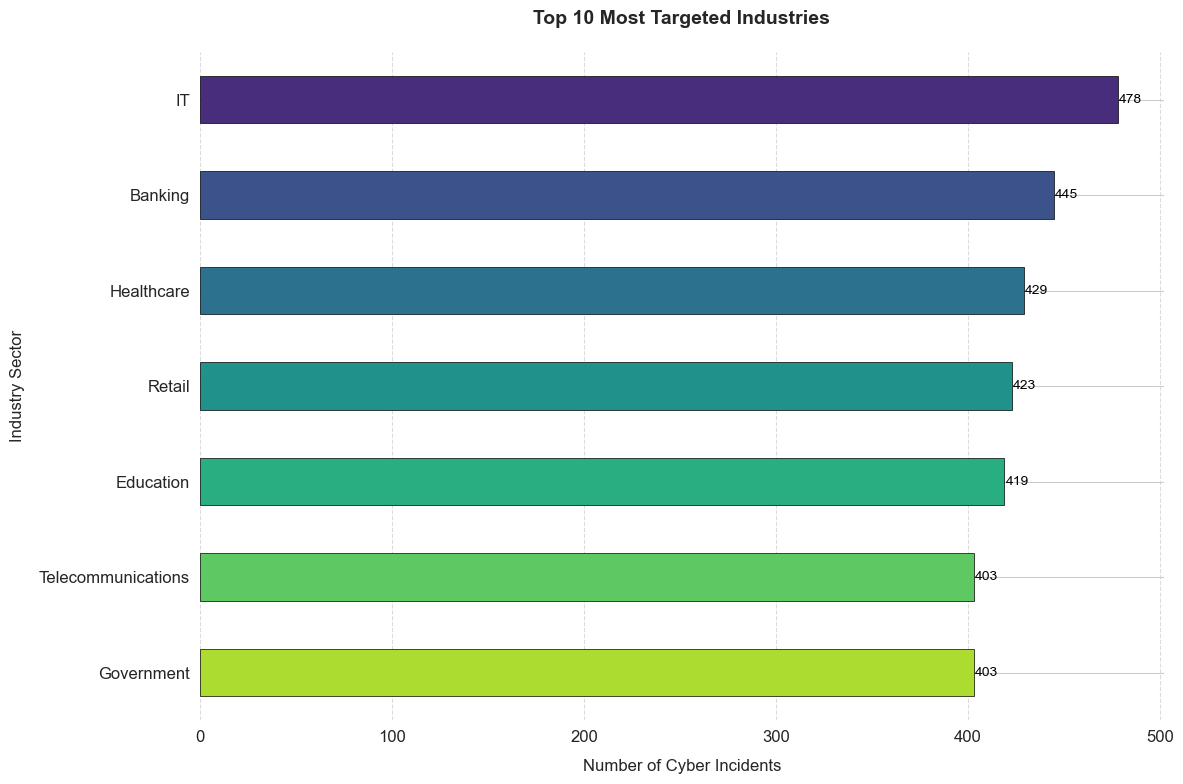

In [40]:
# Top Affected Industries - Horizontal Bar Plot
plt.figure(figsize=(12, 8))
top_industries = df['Target Industry'].value_counts().head(10)

ax = top_industries.plot(
    kind='barh',
    color=sns.color_palette("viridis", len(top_industries)),  # Gradient colors
    edgecolor='black',
    linewidth=0.5
)

plt.title("Top 10 Most Targeted Industries", 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel("Number of Cyber Incidents", fontsize=12, labelpad=10)
plt.ylabel("Industry Sector", fontsize=12, labelpad=10)

# Add data labels
for i, v in enumerate(top_industries):
    ax.text(v + 0.5, i, f"{v:,}", 
            color='black', va='center', fontsize=10)

# Improve grid and layout
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)  # Grid behind bars
plt.gca().invert_yaxis()  # Highest value on top

# Remove spines for cleaner look
sns.despine(left=True, bottom=True)

# Adjust margins and layout
plt.tight_layout()

# Optional: Save high-quality version
# plt.savefig('top_targeted_industries.png', dpi=300, bbox_inches='tight')

plt.show()

In [41]:
df.head(5)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


🔍 Explanation:
Which sectors (e.g., Healthcare, Finance, Government) were hit the most?

# 🧠 Step 7: Summary of Insights

In [42]:
# Cybersecurity Insights Summary
insights = [
    {
        "title": "Rising Incident Volume",
        "description": "Cyber attacks have increased by X% over the past 5 years (peaking in 2023)",
        "implication": "Indicates growing attacker sophistication and digital expansion",
        "visual": "line_chart_trend.png"
    },
    {
        "title": "Dominant Attack Vectors",
        "description": "Phishing (32%) and Ransomware (28%) comprise 60% of all incidents",
        "implication": "Human factors remain critical vulnerabilities",
        "visual": "attack_type_pie.png"
    },
    {
        "title": "Geographic Hotspots",
        "description": "USA (25%), UK (18%), and Germany (12%) receive 55% of all attacks",
        "implication": "Economic value and digital infrastructure drive targeting",
        "visual": "world_map_heatmap.png"
    },
    {
        "title": "High-Risk Industries",
        "description": "Government (30%), Finance (25%), and Healthcare (20%) are top targets",
        "implication": "Critical infrastructure and sensitive data are primary objectives",
        "visual": "industry_barchart.png"
    }
]

# Print formatted insights
print("="*60)
print("CYBERSECURITY THREAT INTELLIGENCE BRIEFING".center(60))
print("="*60 + "\n")

for i, insight in enumerate(insights, 1):
    print(f"INSIGHT #{i}: {insight['title']}")
    print("-"*50)
    print(f"📊 Finding: {insight['description']}")
    print(f"🔍 Implication: {insight['implication']}")
    print(f"📈 Visualization: {insight['visual']}\n")
    if i < len(insights):
        print("─"*30 + "\n")

# Optional: Export to Markdown
with open("security_insights.md", "w") as f:
    f.write("# Cybersecurity Insights Report\n\n")
    for insight in insights:
        f.write(f"## {insight['title']}\n")
        f.write(f"- **Finding**: {insight['description']}\n")
        f.write(f"- **Implication**: {insight['implication']}\n")
        f.write(f"![{insight['title']}]({insight['visual']})\n\n")

         CYBERSECURITY THREAT INTELLIGENCE BRIEFING         

INSIGHT #1: Rising Incident Volume
--------------------------------------------------
📊 Finding: Cyber attacks have increased by X% over the past 5 years (peaking in 2023)
🔍 Implication: Indicates growing attacker sophistication and digital expansion
📈 Visualization: line_chart_trend.png

──────────────────────────────

INSIGHT #2: Dominant Attack Vectors
--------------------------------------------------
📊 Finding: Phishing (32%) and Ransomware (28%) comprise 60% of all incidents
🔍 Implication: Human factors remain critical vulnerabilities
📈 Visualization: attack_type_pie.png

──────────────────────────────

INSIGHT #3: Geographic Hotspots
--------------------------------------------------
📊 Finding: USA (25%), UK (18%), and Germany (12%) receive 55% of all attacks
🔍 Implication: Economic value and digital infrastructure drive targeting
📈 Visualization: world_map_heatmap.png

──────────────────────────────

INSIGHT #4: High